<a href="https://colab.research.google.com/github/Yashdalot/Covid19DataAnalysis/blob/master/Covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import requests
res = requests.get("https://api.covid19india.org/data.json")
d=res.json()
time_series = d['cases_time_series']

In [184]:
import csv

with open('data_series.csv', 'w', newline='') as csvfile:
    fieldnames = time_series[0].keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for obj in time_series :
      writer.writerow(obj)


In [185]:
import pandas as pd
import csv
ds = pd.read_csv("data_series.csv",encoding='latin-1')
statewise_data = d['statewise']

with open('data.csv', 'w', newline='') as csvfile:
    fieldnames = statewise_data[0].keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for obj in statewise_data :
      writer.writerow(obj)
df = pd.read_csv("data.csv",encoding='latin-1')

                                     


#                                              Covid-19 Data Analysis

## Last Update time : - 

In [186]:
print(df['lastupdatedtime'][1])

09/07/2020 19:55:08


## Total Number of Cases in India = 

In [168]:
print("Recovered    :- " , df['recovered'][0])
print("Confirmed    :- " , df['confirmed'][0])
print("Active       :- " ,df['active'][0])
print("Total deaths :- " , df['deaths'][0])
print("\n\n\n\n\n")

Recovered    :-  496048
Confirmed    :-  795755
Active       :-  277967
Total deaths :-  21639








In [169]:

daily_jump=[]
daily_recovered=[]
daily_deaths=[]
for i in range(1,len(ds)):
  x = ds['totalconfirmed'][i] - ds['totalconfirmed'][i-1]
  daily_jump.append(x)
  x = ds['totalrecovered'][i] - ds['totalrecovered'][i-1]
  daily_recovered.append(x)
  x = ds['totaldeceased'][i] - ds['totaldeceased'][i-1]
  daily_deaths.append(x)

## **One day Statistics**


---





In [170]:
print("Yesterday's one Day Jump       " ,daily_jump[-1] )
print("Yesterday's one Day Recoverd   " ,daily_recovered[-1] )
print("Yesterday's one Day Deaths     " ,daily_deaths[-1] )
print("\n\n\n\n")

Yesterday's one Day Jump        25790
Yesterday's one Day Recoverd    19407
Yesterday's one Day Deaths      479







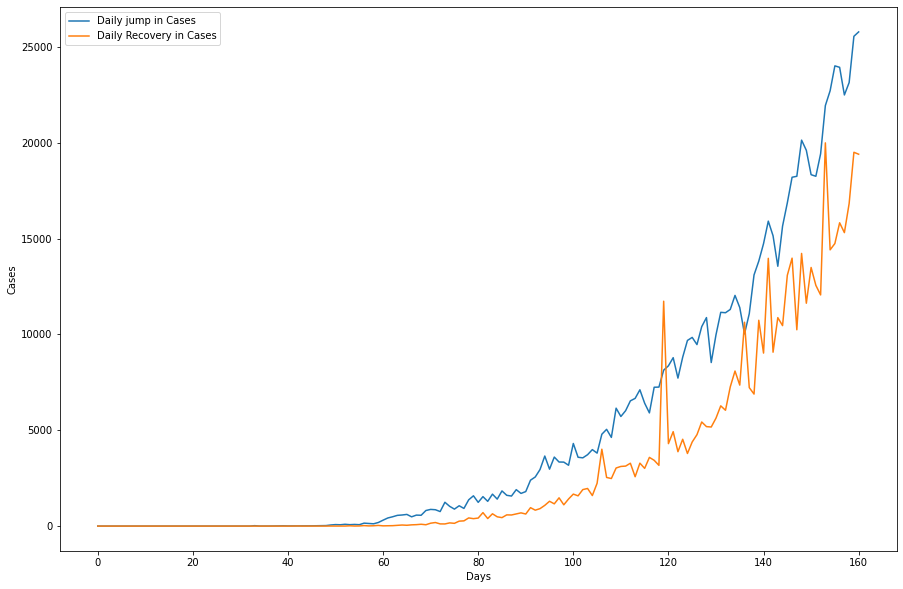

In [171]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(range(len(daily_jump)) ,  daily_jump, label = 'Daily jump in Cases')
plt.plot(range(len(daily_recovered)) ,  daily_recovered, label = 'Daily Recovery in Cases')
plt.xlabel("Days")
plt.ylabel("Cases")
plt.legend()
plt.show()

In [172]:
print("\n\n\n\n")

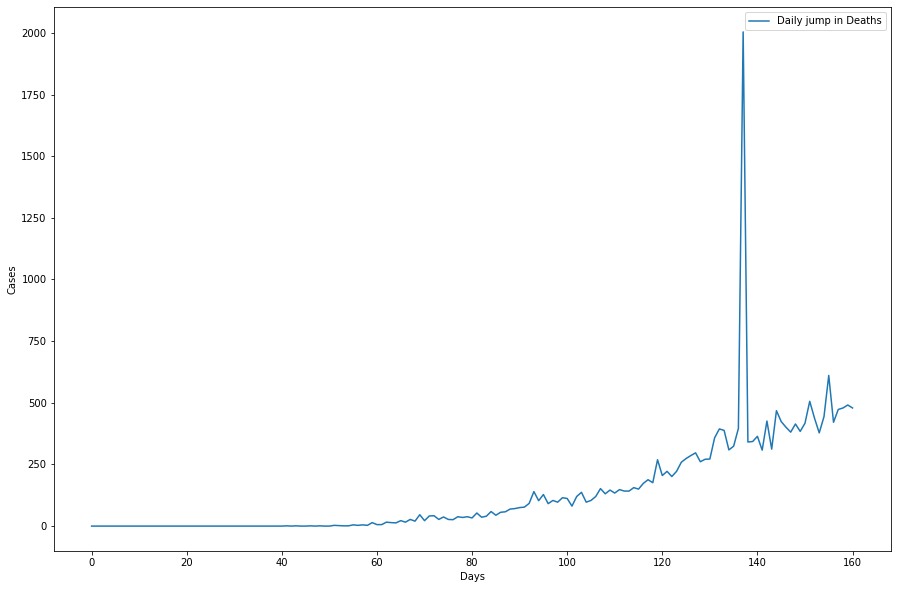

In [173]:
plt.figure(figsize=(15,10))
plt.plot(range(len(daily_deaths)) ,daily_deaths,   label = 'Daily jump in Deaths')
plt.xlabel("Days")
plt.ylabel("Cases")
plt.legend()
plt.show()


# Top 5 states with the most number of cases Active

In [174]:
top= df.sort_values(by ='confirmed' , ascending=False)
print("{:<0}".format("No."),end="          ")
print("{:<5}".format('State'),end="          ")
print("{:<7}".format('Confirmed'),end="          ")
print("{:<10}".format('Active'),end="          ")
print("{:<7}".format('Deaths'))
for i in range(1,6):
    print(i ,end="          ")
    print("{:<20}".format(top['state'][i]),end="")
    print("{:<17}".format(top['confirmed'][i]),end="")
    print("{:<20}".format(top['active'][i]),end="")
    print("{:<10}".format(top['deaths'][i]))
    

No.          State          Confirmed          Active              Deaths 
1          Maharashtra         230599           93654               9667      
2          Tamil Nadu          126581           46655               1765      
3          Delhi               107051           21567               3258      
4          Gujarat             39280            9529                2009      
5          Uttar Pradesh       32362            10373               862       


In [175]:
print("\n\n\n\n\n")

In [176]:
import requests
res = requests.get("https://api.covid19india.org/state_district_wise.json")
d=res.json()
l=['active', 'confirmed', 'deceased', 'recovered','district','state','statecode']

import csv

with open('data1.csv', 'w', newline='') as csvfile:
    fieldnames = l
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for state in d.keys():
      statecode = d[state]['statecode']
      for dist in d[state]['districtData'].keys():
        temp=dict()
        temp['active']  =  d[state]['districtData'][dist]['active']
        temp['confirmed']  =  d[state]['districtData'][dist]['confirmed']
        temp['deceased']  =  d[state]['districtData'][dist]['deceased']
        temp['recovered']  =  d[state]['districtData'][dist]['recovered']
        temp['district']  =  dist
        temp['state']  =  state
        temp['statecode']  =  statecode
        writer.writerow(temp)
        import pandas as pd
df1 = pd.read_csv("data1.csv",encoding='latin-1')

def maxcity(state):
  cities = df1[df1["state"]==state].dropna()["district"].unique()
  #print(cities)
  maxno=0
  c=pd.DataFrame()
  for city in cities:
    # print(city)
    n = df1[df1['district']==city]
    n=n[n['state']==state]
    if(maxno <= int(n['confirmed'])):
      maxno = int(n['confirmed'])
      c = n
  return c

d1={}
cases=[]
datafra=[]
i=0
for state in df1["state"].unique():
  # print(state)
  c = maxcity(state)
  # d1 = c.to_dict(orient ='' )
  cases=[]
  cases.append(int(c['active']));cases.append(int(c['confirmed']));cases.append(int(c['deceased']));cases.append(int(c['recovered']))
  cases.append(str(c['district']).split()[1]);cases.append(str(c['state']).split()[1]);cases.append(str(c['statecode']).split()[1])
  datafra.append(cases)

final_data = pd.DataFrame(datafra,columns = l,index=None)
top_dist = final_data.sort_values(by=['active','confirmed'],ascending=False,ignore_index=True)

**District with most number of cases**



In [177]:
print("{:<0}".format("No."),end="          ")
print("{:<10}".format("District"),end="          ")
print("{:<5}".format('State'),end="          ")
print("{:<7}".format('Confirmed'),end="          ")
print("{:<10}".format('Active'),end="          ")
print("{:<7}".format('Deaths'),end="          ")
print("{:<7}".format('recovered'))
for i in range(1,6):
    print(i ,end="          ")
    print("{:<20}".format(top_dist['district'][i]),end="")
    print("{:<17}".format(top_dist['state'][i]),end="")
    print("{:<20}".format(top_dist['confirmed'][i]),end="")
    print("{:<20}".format(top_dist['active'][i]),end="")
    print("{:<20}".format(top_dist['deceased'][i]),end="")
    print("{:<20}".format(top_dist['recovered'][i]))

No.          District            State          Confirmed          Active              Deaths           recovered
1          Mumbai              Maharashtra      89124               23786               5132                60195               
2          Unknown             Delhi            106263              20780               3257                82226               
3          Chennai             Tamil            73728               20275               1166                52287               
4          Bengaluru           Karnataka        13882               10869               177                 2835                
5          Kamrup              Assam            5712                5316                10                  386                 


In [178]:
print("\n\n\n\n")

## Graphical Representaion

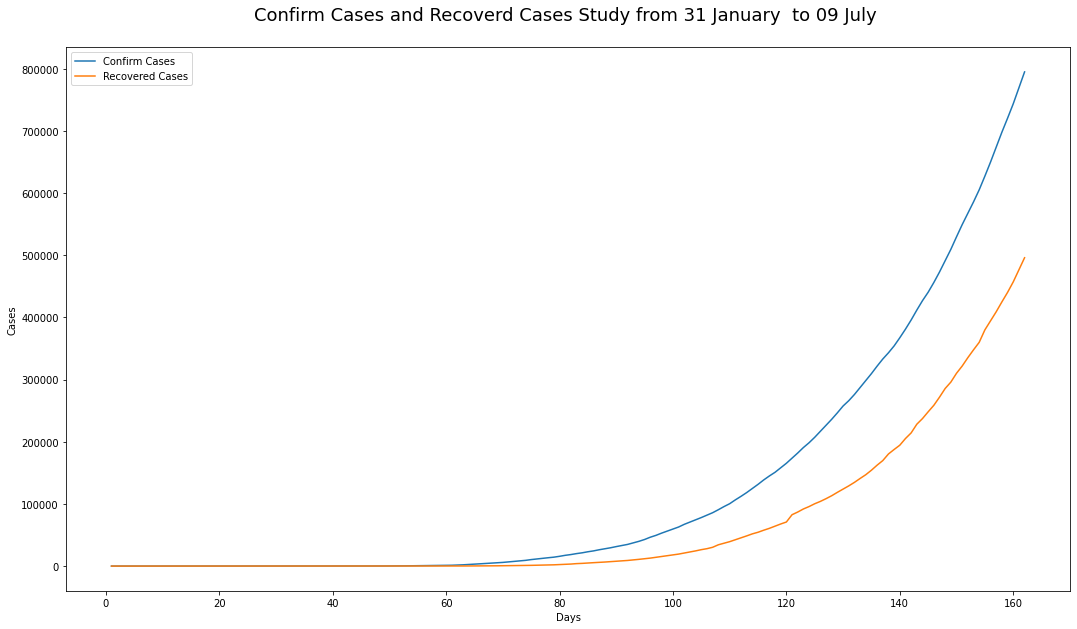

In [179]:
import matplotlib.pyplot as plt
ind = [i for i in range(1,len(ds)+1) ]
ds["index"] = ind
plt.figure(figsize=(18,10))
plt.title("Confirm Cases and Recoverd Cases Study from {} to {}\n".format(ds['date'][1] , ds['date'][ds.shape[0]-1]),fontsize=18)
plt.plot(ds['index'] ,  ds['totalconfirmed'], label = 'Confirm Cases')
plt.plot(ds['index'],  ds['totalrecovered'], label = 'Recovered Cases')
# plt.xticks(rotation=45,fontsize=1)
# plt.show()
plt.xlabel("Days")
plt.ylabel("Cases")
plt.legend()
plt.show()

In [180]:
print("\n\n\n\n")

### State Wise Chart

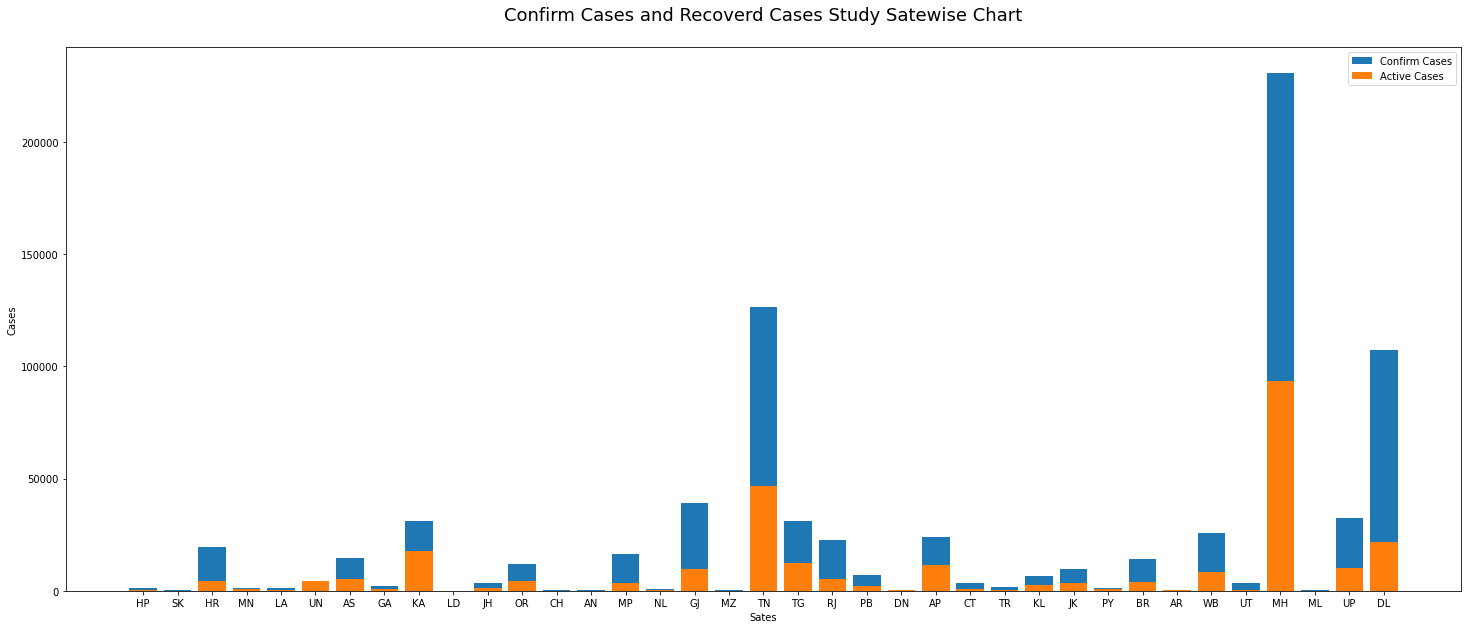

In [181]:
df1 = df[1:]
df1 = df1.sample(frac=1).reset_index(drop=True)
plt.figure(figsize=(25,10))
plt.title("Confirm Cases and Recoverd Cases Study Satewise Chart\n",fontsize=18)
plt.bar(df1['statecode'] ,  df1['confirmed'], label = 'Confirm Cases')
plt.bar(df1['statecode'],  df1['active'], label = 'Active Cases')
plt.xlabel("Sates")
plt.ylabel("Cases")
plt.legend()
# plt.rcParams["figure.figsize"] = (100,100)
plt.show()

### Created By Yash Patidar